![](./static/workflow.png)

# Part1

## Problem Statement
## Data Quality Accessment
- why do we need to check data quality?
- what do we need to check data quality? 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('./dataset/CarPrice_Assignment.csv')
df.shape


## comments: 
## would it be better if you list out things you want to analyze so audience are prepared for the following?
## e.g. peek to data --> what features --> feature in plain english --> missing ? duplicate values? --> feature data types? 
## --> stats for each type --> summary
## you may want to give 1 sentence simply explain each thing.

(205, 26)

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

![](./static/column-description.png)

In [5]:
# check Missing value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

> **NO MISSING VALUE IS AVALIABLE**

In [6]:
# Check Duplication
df.duplicated().sum()

np.int64(0)

> **NO DUPLICATON**

In [7]:
#Check datatype
df.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.shape

(205, 26)

In [9]:
# Check the number of unique values of each column
df.nunique()


car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:

df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [11]:
#Check statistics of data set
df.describe()


## Comments: 
## take one example to explain?
## you may want to use helper short video: https://www.youtube.com/shorts/NySKuyBS3LM

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber', 'fuelsystem']
len(categorical_columns)  ## if you want audiance to know, show it directly

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


## Insights from Statistics 
1. There are 205 car models, each unique in attributes (no missing value and unique)
2. Price, the one we gonna predict
- Min Price: 5118
- Max Price: 45400
- Average Price: 13277
3. 26 columns in total - 1 column (price) - 1 column (car_ID) = 24 columns 
    - Categorical variables: 10 columns 
    - Numerical variables: 14 columns 
        - curbweight and enginesize shows a notabe variability
        - potential outliers present in compressionratio, horsepower 

![](./static/workflow.jpeg)

## Exploratory Data Analysis (EDA)
- Analysis in price features 
- Analysis in numerical features 
- Analysis in categorical features



- comments: same as beginning, you may want to explain the things audiences to expect: 
for histogram, heatmap, boxplot, is it easier for audience if you use a helper short video to explain? <br>
after each graph, good to directly give key findings so that info can be pushed to audience head


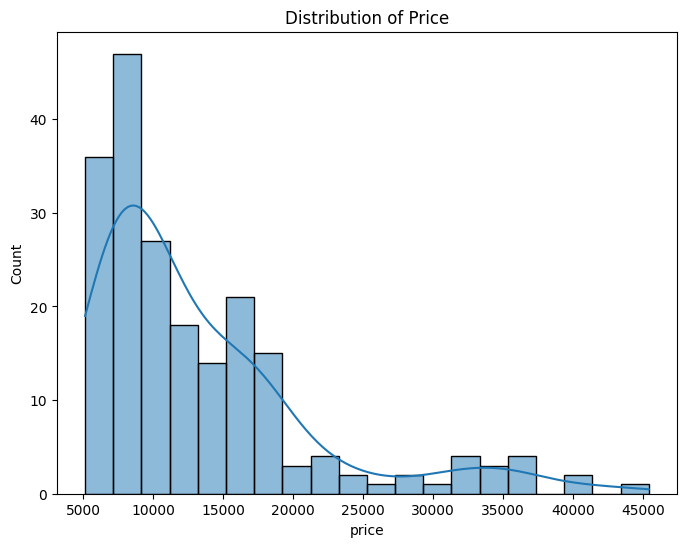

In [13]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

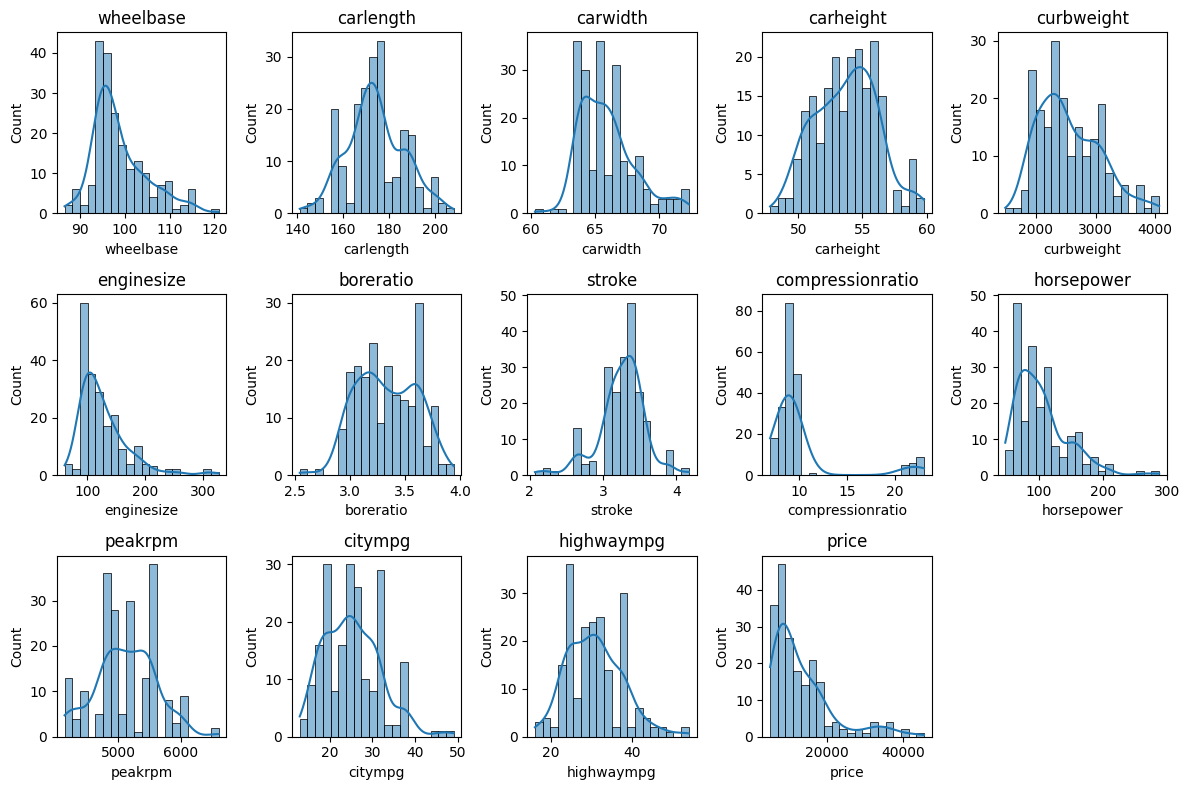

In [14]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

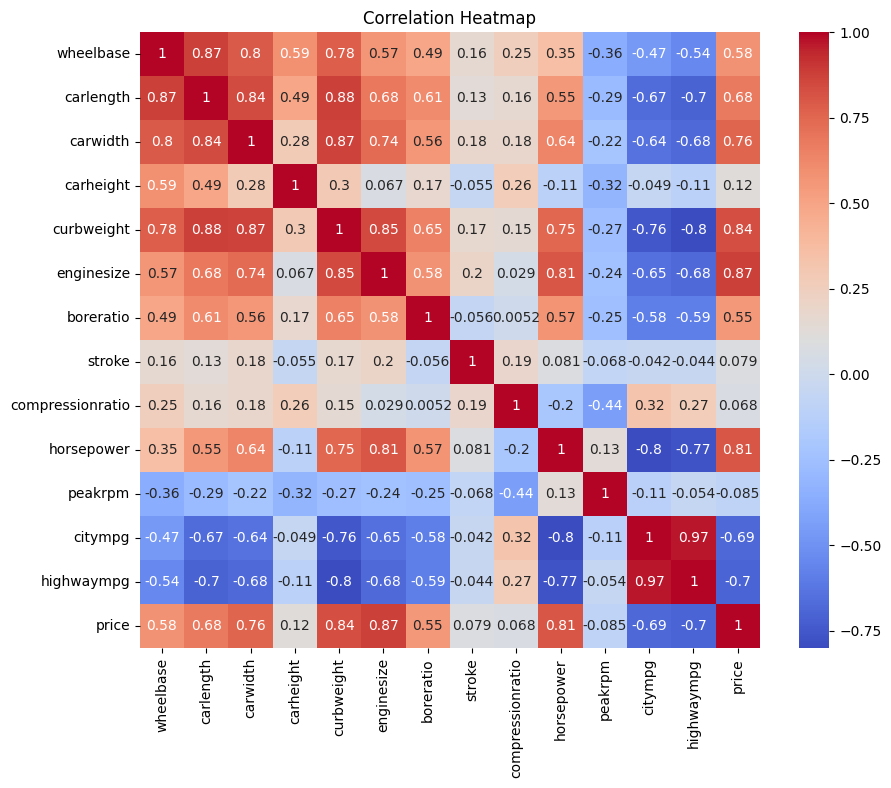

In [15]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## simple explain: positive red, neg blue. darker --stronger

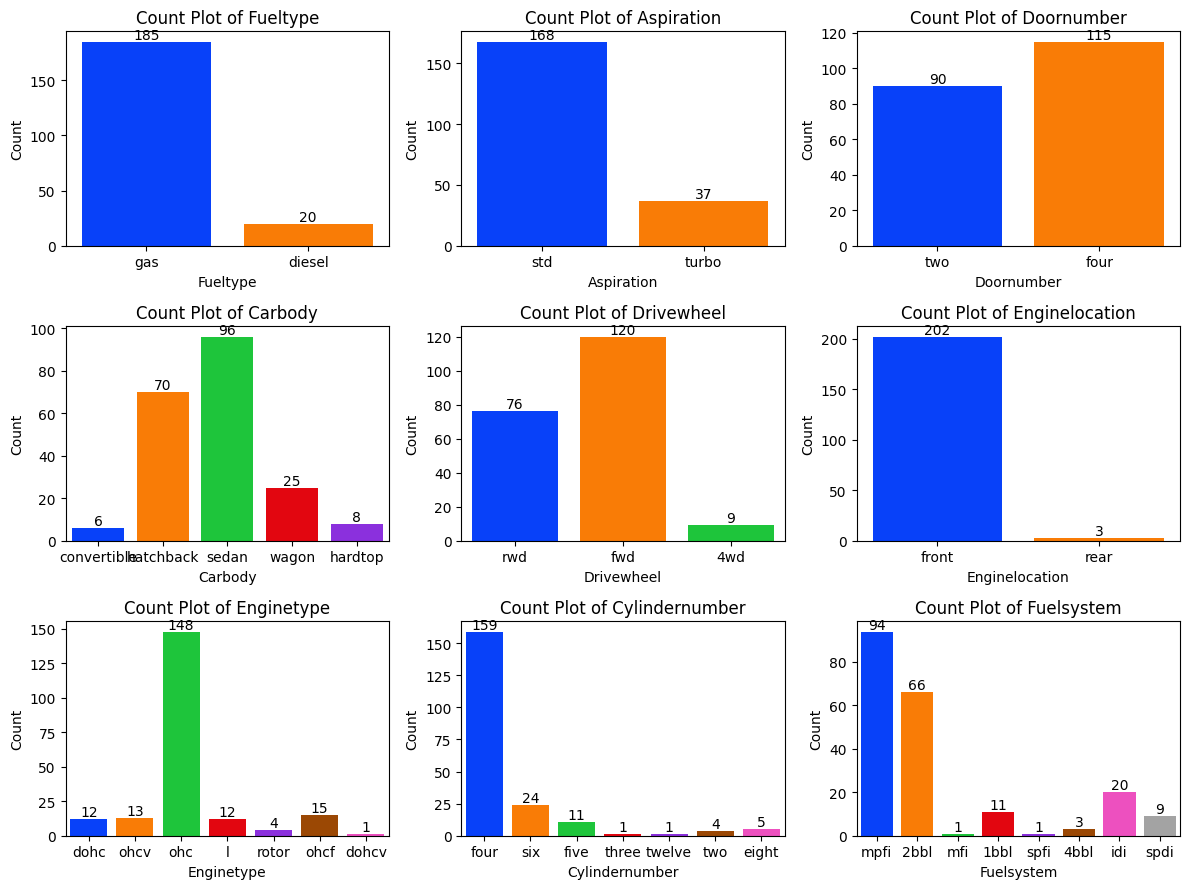

In [16]:
# Define the list of categorical columns to analyze
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()




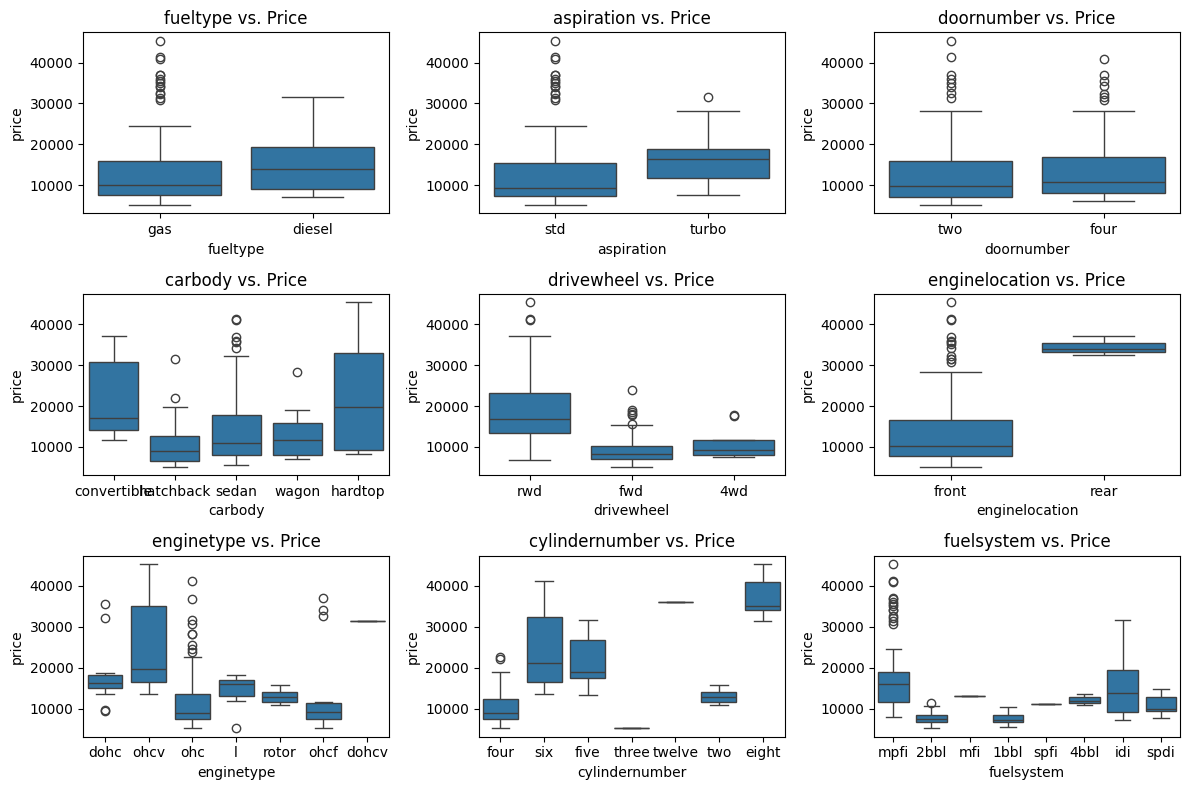

In [17]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

## explain boxplot using one simple example

In [18]:
len(df['CarName'].unique())

147

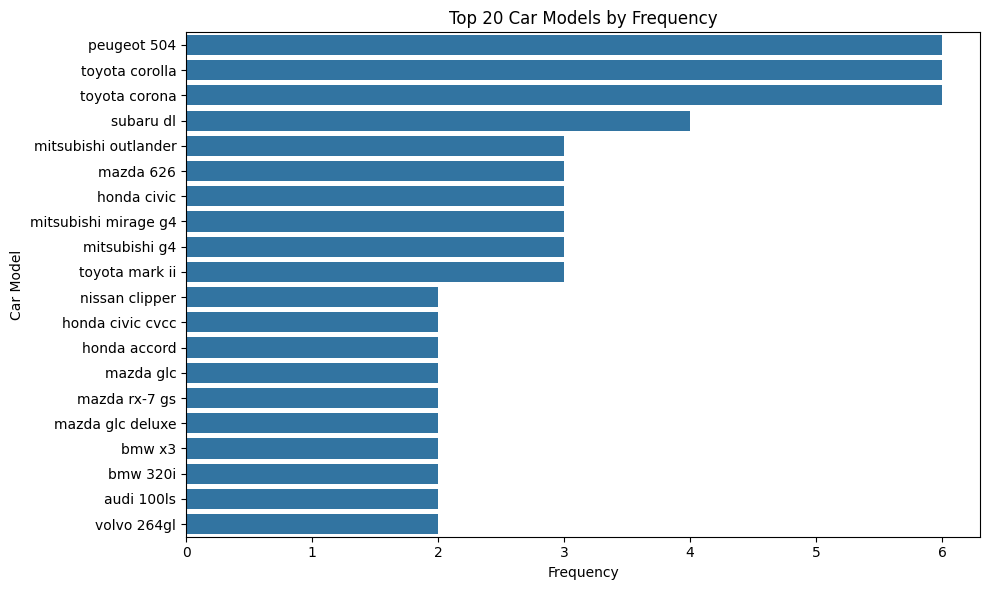

In [19]:
n = 20  # Number of top car models to plot
top_car_models = df['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

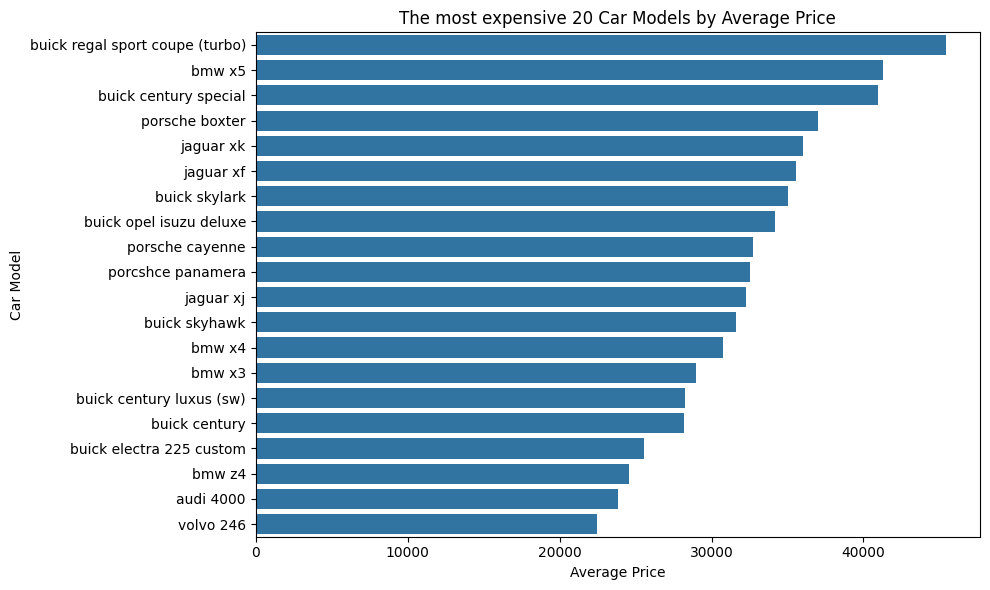

In [20]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'The most expensive {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

## 80% fortune to 20% ppl

In [21]:
# seaborn, matplotlib

## What We Get

- The Shape DataSet: Rows = 205, columns = 26

    - No null value 
    - No Duplicated value
    - There are some typo errors in CarName column

### Some Analyst

#### Price cars 
- Avg price = $13,276 

- Min price = $5,118 

- Max price = $45,400 

#### Numerical Features 
- As carlength, carwidth, curbweight, enginesize, and horsepower get increased, so does the price 
- citympg and highway mpg have some negative effect on car price 
- The rest does not seem to have any significant impact 


#### Categorical Features 
- Most using car working in Gas (around 90%) and average price is less than the car working in Diesel 
- Most using car working on std (around 80%) and average price is less than the car working in turbo
- 56% of users drive cars with 4 doors, while 46% drive cars with 2 doors, and boths of them maintain a similar average price 
- Most people prefer sedan car type. while the similar cheap price types like batchback and wagon are very popular as well 
- Majority of users opt for fwd in drivewheel, front in engine location, ohc in enginetype and 4 cylindernumber for their cars, correlating with lower prices 



#### CarName 
- The most frequent one is toyota and its price is below the average

Do you agree with it? **Review This Part by Yourself**

# Part 2: Model Development 
## Data Preprocess 
1. filter out the outliners ()
2. Refine the columns: split CarName into brand and model columns 
3. Encode categorical columns into numbers 
4. Add some feature engineering 
5. Scale the data: scale the numerical data into a common range, preventing the ones with larger ranges can dominate the models 

<Axes: >

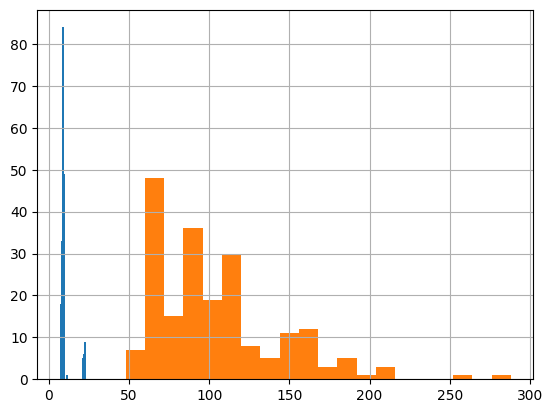

In [22]:
df['compressionratio'].hist(bins = 20)  # filter out > 20 
df['horsepower'].hist(bins = 20) # filter out > 250

## comments: 
## why do you need to preprocess data?  bins explain, outliers?  
## As always, list out things to do first to set up audience expectation. and simply explain why each processing is needed? 

In [23]:
df.shape

(205, 26)

In [24]:
# # filter out the outliners in the compressionratio and horsepower 

# df =df [(df['compressionratio'] < 20) & (df['horsepower'] < 250)]
# df.shape

In [25]:
# Extract brand and model from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']


# Encoding categorical variables
import pickle 

import os 

os.makedirs('./models', exist_ok = True)


for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    with open(f'./models/label_encoder_{column}.pkl', 'wb') as f:
        pickle.dump(label_encoder, f)


In [26]:
df[categorical_columns[-1]].unique()

## why encoder? 

array([ 79, 123,  29,   1,   2,  74,  16,  13,  17,  12, 134, 135, 141,
       136, 137,  86,  98, 132, 112,  43,  66,  97,  51,  50,  61,  67,
        62,  44,  48,  31,  32,  47,  30,  46, 107,  45,  28,  26,  27,
       139, 138, 140, 118,  84, 117, 115,  22,  80, 116,  81,  83,  82,
        73,  41,  40, 120, 102, 121,  42, 113,  63,  94,  89, 104,  78,
        95,  99, 105, 133,  85, 114,  90, 127,  91,  87, 100,  49, 101,
        69,  75, 103, 125,  88,  18,  11,  19,  21,  20,  77,  65, 119,
        76, 131,  72,  92, 106,  37,  34,   4,  15,  23,  25,  24,   0,
        71,  35,  33, 108, 109, 128, 129,  60,  57,  53,  58,  54,  36,
        93,  52,  55,  39,  56,  59, 122, 126,  64,  38, 110,   3,  96,
       130,  14, 124,  68, 111,   6,   5,   7,   8,  10,  70,   9])

In [27]:



numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
pickle.dump(scaler, open('./models/scaler.pkl','wb'))

## what scaler? why? 

In [28]:
scaler.mean_, scaler.var_

## check understanding mean, var

(array([9.87565854e+01, 1.74049268e+02, 6.59078049e+01, 5.37248780e+01,
        2.55556585e+03, 1.26907317e+02, 3.32975610e+00, 3.25541463e+00,
        1.01425366e+01, 1.04117073e+02, 5.12512195e+03, 2.52195122e+01,
        3.07512195e+01]),
 array([3.60848957e+01, 1.51466207e+02, 4.57945128e+00, 5.94167377e+00,
        2.69785397e+05, 1.72565482e+03, 7.29984771e-02, 9.78633647e-02,
        1.57001428e+01, 1.55611312e+03, 2.26405473e+05, 4.25908388e+01,
        4.71917668e+01]))

## Train

In [29]:
# Splitting the dataset
X = df.drop(['price','car_ID', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


## why split?
## explain linear regression?
## how to check?

In [30]:
X_test.shape

(41, 40)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Rooted Mean Squared Error: {rmse}')

## find visual presentation

 R-squared: 0.8626797236261018
Rooted Mean Squared Error: 3292.508886132486


In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.head()

,Actual Value,Predicted Value,Difference
15,30760.000,24724.229616,6035.770384
9,17859.167,19791.693507,-1932.526507
100,9549.000,8375.916465,1173.083535
132,11850.000,13809.916538,-1959.916538
68,28248.000,26890.359637,1357.640363


In [33]:
# save model 
import pickle 

pickle.dump(model, open('./models/linear_reg.pkl','wb'))


## tired, continue next time!  new data? overfit?

In [34]:
## comments 
## You can announce break & invite audience to try out the interactive page
## For audience to better understand model performance, you can select 1 data point in the test data set for them to predict and compare
## such practice will help them to familar with features, inpire interest for part 3, 
## for part3, simply introduce the tool gradio 